# Кривая обучения (Learning Curve)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.datasets import load_digits

digits = load_digits()

In [4]:
X, y = digits.data, digits.target
N, d = X.shape
print(N, d)

1797 64


In [5]:
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(N, test_size = 0.2, random_state = 0)

`ShuffleSplit` – это _итератор_:

In [6]:
from sklearn.model_selection import learning_curve

In [7]:
def draw_leaning_curve(model, X = X, y = y, cv = cv, 
                       train_sizes = np.linspace(0.1, 1.0, 10)):

    sizes, scores_train, scores_test = learning_curve(model, X, y, cv = cv, 
                train_sizes = train_sizes)

    err_train = 1 - scores_train
    err_test  = 1 - scores_test

    mean_err_train = np.mean(err_train, axis = 1)
    std_err_train  = np.std (err_train, axis = 1)
    mean_err_test  = np.mean(err_test,  axis = 1)
    std_err_test   = np.std (err_test,  axis = 1)

    plt.figure(figsize = (8, 6))
    plt.fill_between(sizes, mean_err_train - std_err_train, mean_err_train + std_err_train, alpha = 0.15, 
                     color = "r")
    plt.fill_between(sizes, mean_err_test  - std_err_test,  mean_err_test  + std_err_test,  alpha = 0.15, 
                     color = "m")
    plt.plot(sizes, mean_err_train, 'ro-', markeredgecolor = 'r', label = "Train error")
    plt.plot(sizes, mean_err_test,  'mo-', markeredgecolor = 'm', label = "CV error")
    plt.xlabel('N')
    plt.ylabel('Error')
    plt.grid()
    plt.legend(loc = 'best')

# Деревья решений

Text(0.5, 1.0, 'Decision Tree Classifier')

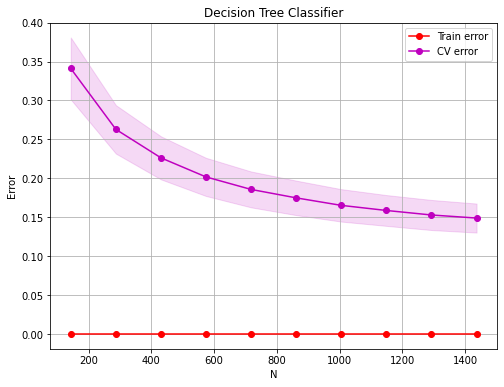

In [ ]:
from sklearn.tree import DecisionTreeClassifier
draw_leaning_curve(DecisionTreeClassifier())
plt.title('Decision Tree Classifier')

$\to$ Наблюдается _большой разброс_ - переобучение

# Random Forest

Text(0.5, 1.0, 'Random Forest Classifier')

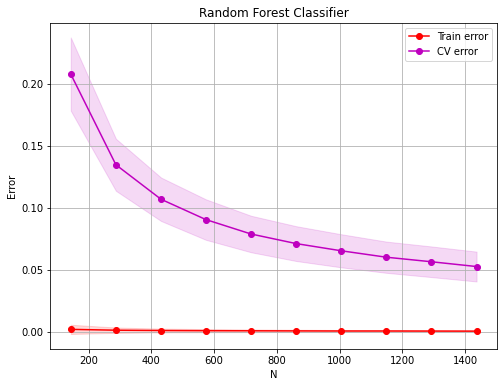

In [9]:
from sklearn.ensemble import RandomForestClassifier
draw_leaning_curve(RandomForestClassifier(n_estimators = 10))
plt.title('Random Forest Classifier')

$\to$ Разброс сократился, но, по-прежнему, большой

# Gradient Boosting Tree

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
draw_leaning_curve(GradientBoostingClassifier(n_estimators = 10))
plt.title('Gradient Boosting Classifier')

# Naive Bayes

Text(0.5, 1.0, 'Gaussian NB')

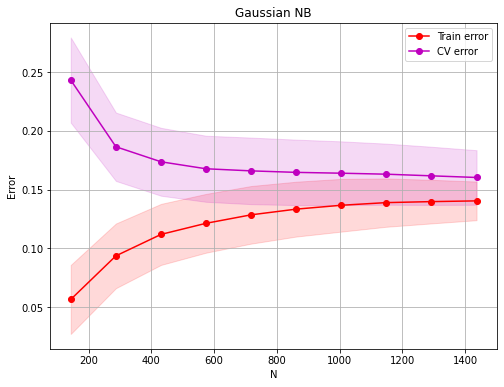

In [ ]:
from sklearn.naive_bayes import GaussianNB
draw_leaning_curve(GaussianNB())
plt.title('Gaussian NB')

$\to$ Наблюдается большое смещение - недообучение

(0.0, 0.1)

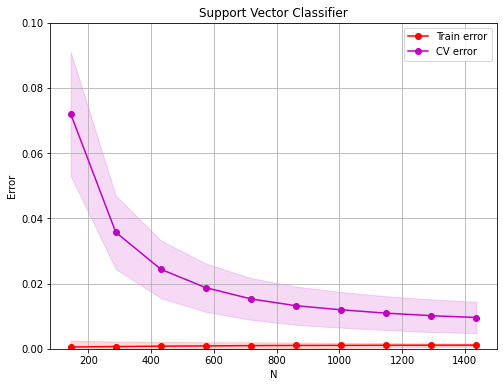

In [ ]:
from sklearn.svm import SVC
draw_leaning_curve(SVC(gamma = 0.001))
plt.title('Support Vector Classifier')
plt.ylim(0, 0.1)

$\to$ маленькое смещение и маленький разброс

# $k$NN

Text(0.5, 1.0, '$k$ Neighbors Classifier')

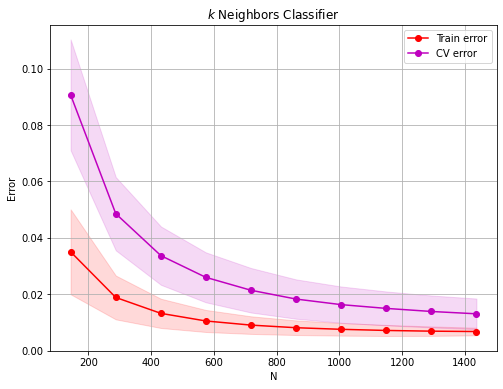

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
draw_leaning_curve(KNeighborsClassifier(n_neighbors = 3))
plt.title('$k$ Neighbors Classifier')

$\to$ маленькое смещение и маленький разброс!

### Что делать, если наблюдается _большое смещение_?

Типичный пример кривой обучения в этом случае - наивный байес в задаче выше.

- Взять более сложную модель (в частности, уменьшить параметр регуляризации, добавить новые признаки и т.п. или вообще взять модель из другого класса)
- Само по себе увеличение длины обучающей выборки при большом смещении ситуацию, как правило, не улучшает 

### Что делать, если наблюдается _большой разброс_?

Типичный пример кривой обучения в этом случае - дерево решений в задаче выше.

- Взять более простую модель (в частности, увеличить параметр регуляризации, удалить лишние признаки и т.п.)
- Взять больше данных для обучения